Plots for Allison's lya results 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/'
os.listdir(path)

['oehua1010_noSR_smearingcorr_MCMC_results.csv',
 'allfour2_noSR_nosmearing_MCMC_results.csv',
 'allfour_noSR_nosmearing_MCMC_results.csv',
 'allfour_SR_ISMfixedonly_equalweighting_MCMC_results.csv',
 'allfour_SR_ISMfixedonly_MCMC_results.csv',
 'allfour_SR_RVvaryonly_MCMC_results.csv',
 'allfour_SR_sameprofile_MCMC_results.csv',
 'NV_allfour_MCMC_results.csv',
 'NV_allfour_v2_MCMC_results.csv',
 'oehua1010_noSR_nosmearing_MCMC_results.csv',
 'oehua1010_SR_nosmearing_MCMC_results.csv',
 'oehua2010_noSR_nosmearing_MCMC_results.csv',
 'oehua2010_noSR_smearingcorr_MCMC_results.csv',
 'oehua2010_SR_nosmearing_MCMC_results.csv',
 'oehua3010_noSR_nosmearing_MCMC_results.csv',
 'oehua3010_noSR_smearingcorr_MCMC_results.csv',
 'oehua3010_SR_nosmearing_MCMC_results.csv',
 'oehua4010_noSR_nosmearing_MCMC_results.csv',
 'oehua4010_noSR_smearingcorr_MCMC_results.csv',
 'oehua4010_SR_nosmearing_MCMC_results.csv',
 'SiIII_allfour_MCMC_results.csv',
 'SiIII_allfour_v2_MCMC_results.csv']

In [3]:
sr_specs = glob.glob('{}*0_SR_nosmearing*'.format(path))
# args = np.argsort(sr_specs)
# sr_specs = sr_specs[args]
sr_specs


['/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua1010_SR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua2010_SR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua3010_SR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua4010_SR_nosmearing_MCMC_results.csv']

In [4]:
phase = np.array([0.73, 0.03, 0.3, 0.53])
phase_sort = phase[np.argsort(phase)]
sr_specs_phase = np.array(sr_specs)[np.argsort(phase)]

In [5]:
data = Table.read(sr_specs[1])

In [6]:
data.dtype.names

('col0',
 'lya_model_low_2sig',
 'lya_model_low_1sig',
 'lya_model_median',
 'lya_model_high_1sig',
 'lya_model_high_2sig',
 'lya_intrinsic_low_2sig',
 'lya_intrinsic_low_1sig',
 'lya_intrinsic_median',
 'lya_intrinsic_high_1sig',
 'lya_intrinsic_high_2sig',
 'lya_ism_low_2sig',
 'lya_ism_low_1sig',
 'lya_ism_median',
 'lya_ism_high_1sig',
 'lya_ism_high_2sig',
 'lya_reversal_low_2sig',
 'lya_reversal_low_1sig',
 'lya_reversal_median',
 'lya_reversal_high_1sig',
 'lya_reversal_high_2sig',
 'lya_intrinsic_fluxes',
 'vs_n value',
 'am_n value',
 'fw_L_n value',
 'fw_G_n value',
 'h1_col value',
 'h1_b value',
 'h1_vel value',
 'h1_col2 value',
 'h1_b2 value',
 'h1_vel2 value',
 'h1_col3 value',
 'h1_b3 value',
 'h1_vel3 value',
 'd2h value',
 'p value',
 'wave_lya',
 'flux_lya',
 'error_lya')

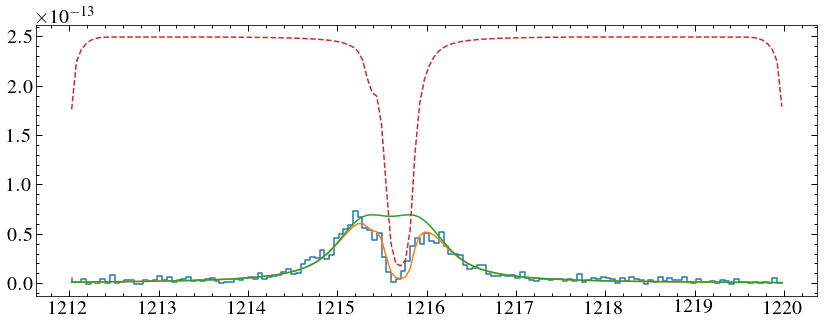

In [7]:
plt.step(data['wave_lya'], data['flux_lya'])
plt.plot(data['wave_lya'], data['lya_model_median'])
plt.plot(data['wave_lya'], data['lya_intrinsic_median'])
plt.plot(data['wave_lya'], data['lya_ism_median']*0.25e-12, ls='--')
# plt.plot(data['wave_lya'], data['lya_intrinsic_median']*data['lya_ism_median'])


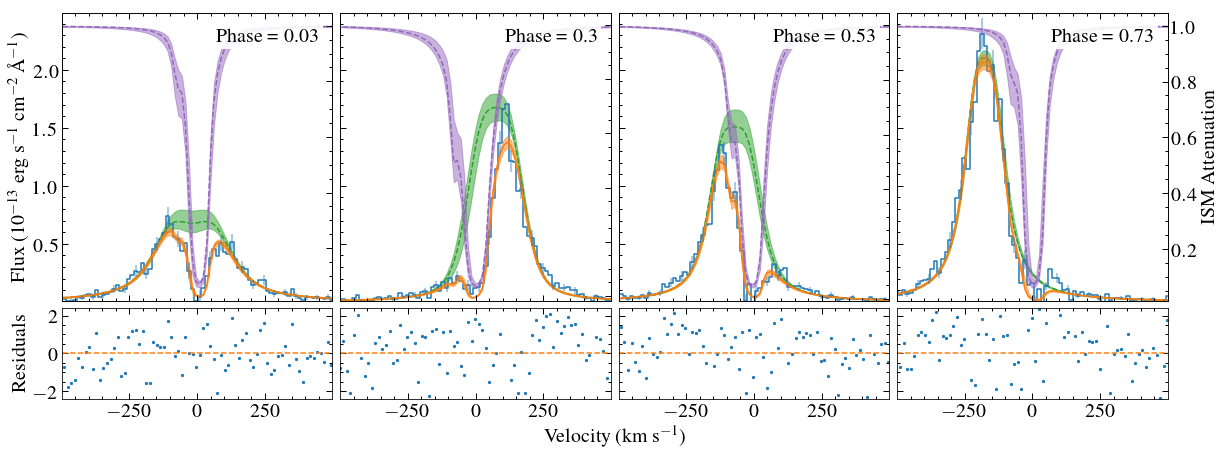

In [8]:
lya = 1215.67
fig, axes = plt.subplots(figsize=(18,7))
gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale
# plt.figure(figsize=(20, 5))
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    ax = plt.subplot(gs[0:3, i])
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
    plt.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
    plt.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
    plt.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)
    
    plt.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
    plt.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)
    
#     plt.plot(v, data['lya_ism_median']*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['lya_ism_high_1sig']*ism_scale,data['lya_ism_low_1sig']*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
    plt.xlim(-499, 499)
    plt.ylim(0.01, 2.49)
    if i > 0:
        # plt.yticks(visible=False)
        ax.set_yticklabels([])
    if i == 0:
        # plt.legend(loc=2, frameon=True)
        plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
    plt.xticks(visible=False)
    
    ax2=ax.twinx()
    ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
    plt.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
    
    ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
    if i < 3:
        ax2.set_yticklabels([])
    if i == 3:
        ax2.set_ylabel('ISM Attenuation')
        
    
    
    
    plt.subplot(gs[3:, i])
    plt.scatter(v, ((data['flux_lya']*fscale)-(data['lya_model_median']*fscale))/(data['error_lya']*fscale), alpha=1, s=5)
    plt.xlim(-499, 499)
    plt.ylim(-2.4,2.4)
    if i > 0:
        plt.yticks(visible=False)
    plt.axhline(0, ls='--', c='C1')
    if i == 0:
        plt.ylabel('Residuals')
    
     
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)
plt.savefig('plots/eg_uma_lya_fit_sr.png', dpi=150, facecolor='w')
plt.savefig('plots/eg_uma_lya_fit_sr.pdf')
    

And the same without SR

In [9]:
nosr_specs = glob.glob('{}*0_noSR_nosmearing*'.format(path))
nosr_specs

['/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua1010_noSR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua2010_noSR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua3010_noSR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua4010_noSR_nosmearing_MCMC_results.csv']

In [10]:
nosr_specs_phase = np.array(nosr_specs)[np.argsort(phase)]

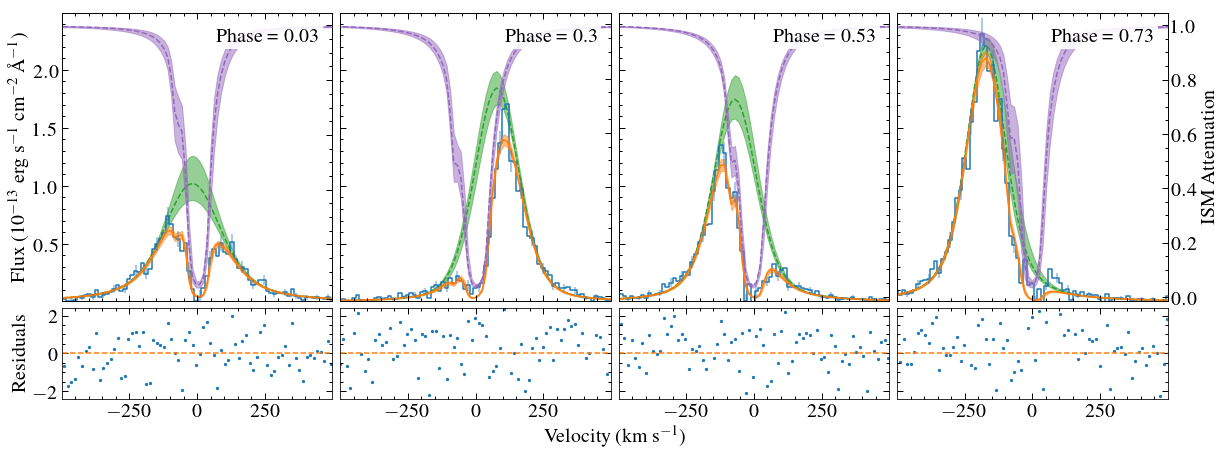

In [11]:
lya = 1215.67
fig, axes = plt.subplots(figsize=(18,7))
gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale
# plt.figure(figsize=(20, 5))
for i, spec in enumerate(nosr_specs_phase):
    data = Table.read(spec)
    ax = plt.subplot(gs[0:3, i])
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
    plt.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
    plt.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
    plt.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)
    
    plt.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
    plt.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)
    
#     plt.plot(v, data['lya_ism_median']*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['lya_ism_high_1sig']*ism_scale,data['lya_ism_low_1sig']*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
    plt.xlim(-499, 499)
    plt.ylim(0.01, 2.49)
    if i > 0:
        # plt.yticks(visible=False)
        ax.set_yticklabels([])
    if i == 0:
        # plt.legend(loc=2, frameon=True)
        plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
    plt.xticks(visible=False)
    
    ax2=ax.twinx()
    ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
    plt.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
    
    ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
    if i < 3:
        ax2.set_yticklabels([])
    if i == 3:
        ax2.set_ylabel('ISM Attenuation')
        
    
    
    
    plt.subplot(gs[3:, i])
    plt.scatter(v, ((data['flux_lya']*fscale)-(data['lya_model_median']*fscale))/(data['error_lya']*fscale), alpha=1, s=5)
    plt.xlim(-499, 499)
    plt.ylim(-2.4,2.4)
    if i > 0:
        plt.yticks(visible=False)
    plt.axhline(0, ls='--', c='C1')
    if i == 0:
        plt.ylabel('Residuals')
    
     
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)
plt.savefig('plots/eg_uma_lya_fit_nosr.png', dpi=150, facecolor='w')
plt.savefig('plots/eg_uma_lya_fit_nosr.pdf')
    

-17.824879382574647 km / s
74.29481307656982 km / s
-72.0550969188134 km / s
-177.08386312751188 km / s
-17.46324142232819 km / s
78.73844491927993 km / s
-70.77576143430441 km / s
-171.1286394668425 km / s


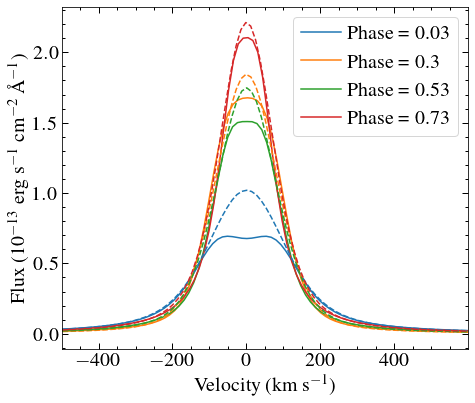

In [14]:
plt.figure(figsize=(7,6))
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    v_ly = data['vs_n value'][2]*u.km/u.s
    print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v-v_ly, data['lya_intrinsic_median']*fscale, label='Phase = {}'.format(phase_sort[i]))
    
plt.gca().set_prop_cycle(None)
for i, spec in enumerate(nosr_specs_phase):
    data = Table.read(spec)
    v_ly = data['vs_n value'][2]*u.km/u.s
    print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v-v_ly, data['lya_intrinsic_median']*fscale, ls='--')
plt.xlim(-499, 599)
plt.legend(frameon=True)
plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()

because I can. Well that did not work, cyberpunk version needs a lot of work.

In [13]:
# import mplcyberpunk

# plt.style.use("cyberpunk")
    
# lya = 1215.67
# fig, axes = plt.subplots(figsize=(18,7))
# gs = GridSpec(4, 4, figure=fig)
# ism_scale = 2.3e-13 #scaling ism to plot
# fscale = 1e13 #scaling flux to axis
# ism_scale *= fscale
# # plt.figure(figsize=(20, 5))
# for i, spec in enumerate(sr_specs_phase):
#     data = Table.read(spec)
#     ax = plt.subplot(gs[0:3, i])
#     v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
#     plt.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
#     plt.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
#     plt.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
#     plt.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)
    
#     plt.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
#     plt.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)
    
# #     plt.plot(v, data['lya_ism_median']*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
# #     plt.fill_between(v.value, data['lya_ism_high_1sig']*ism_scale,data['lya_ism_low_1sig']*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
#     plt.xlim(-499, 499)
#     plt.ylim(0.01, 2.49)
#     if i > 0:
#         # plt.yticks(visible=False)
#         ax.set_yticklabels([])
#     if i == 0:
#         # plt.legend(loc=2, frameon=True)
#         plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
#     plt.xticks(visible=False)
    
#     ax2=ax.twinx()
#     ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
    
#     ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
#     if i < 3:
#         ax2.set_yticklabels([])
#     if i == 3:
#         ax2.set_ylabel('ISM Attenuation')
        
    
    
    
#     plt.subplot(gs[3:, i])
#     plt.scatter(v, ((data['flux_lya']*fscale)-(data['lya_model_median']*fscale))/(data['error_lya']*fscale), alpha=1, s=5)
#     plt.xlim(-499, 499)
#     plt.ylim(-2.4,2.4)
#     if i > 0:
#         plt.yticks(visible=False)
#     plt.axhline(0, ls='--', c='C1')
#     if i == 0:
#         plt.ylabel('Residuals')
    
     
        
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# # plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
# plt.xlabel('Velocity (km s$^{-1}$)', size=20)
# plt.tight_layout()
# plt.subplots_adjust(hspace=0.08, wspace=0.03)
# # plt.savefig('plots/eg_uma_lya_fit_sr.png', dpi=150, facecolor='w')
# # plt.savefig('plots/eg_uma_lya_fit_sr.pdf')
    